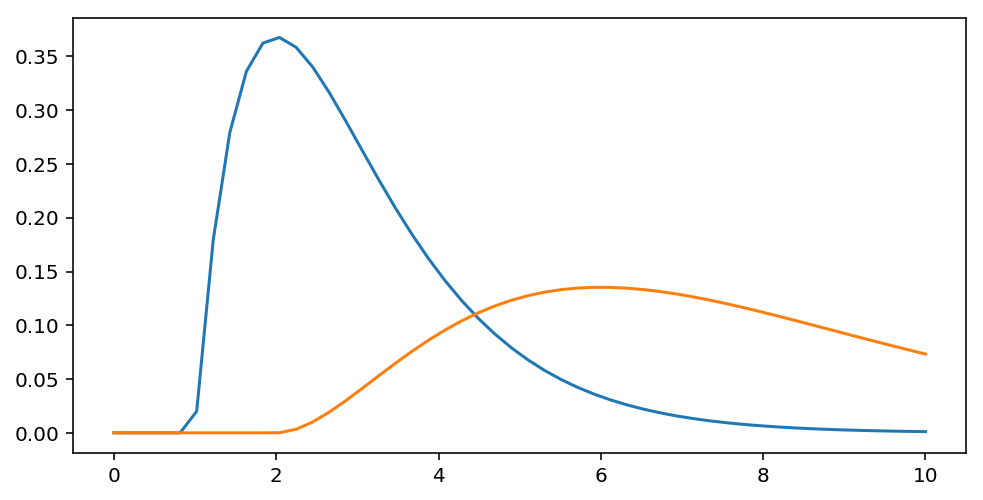

In [94]:
# Gamma
from scipy.stats import gamma

# Plot the pdf
plt.figure(figsize=(8, 4))
x1 = np.linspace(0, 10)
plt.plot(x1,
         stats.gamma.pdf(x1, a=2, loc=1,scale=1))
plt.plot(x1,
         stats.gamma.pdf(x1, a=3, loc=2,scale=2))


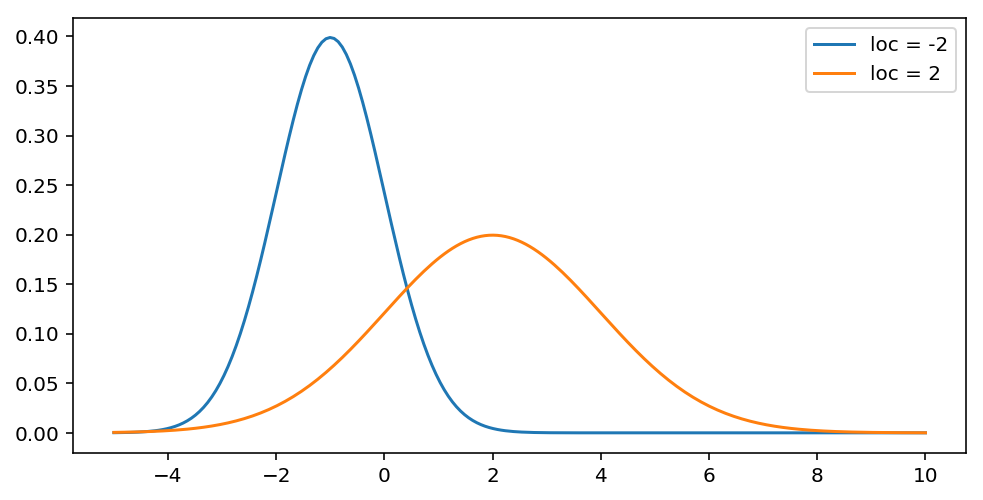

In [89]:
# Normal Distribution
plt.figure(figsize=(8, 4)) # Create a new figure with a particular size
x = np.linspace(-5, 10, 200) # Array with 200 linearly spaced points in [-5,5]

plt.plot(x, stats.norm.pdf(x, loc=-1, scale=1), label='loc = -2')
plt.plot(x, stats.norm.pdf(x, loc=2, scale=2), label='loc = 2')
plt.legend() # Show the legend in the top right corner


(0, 2)

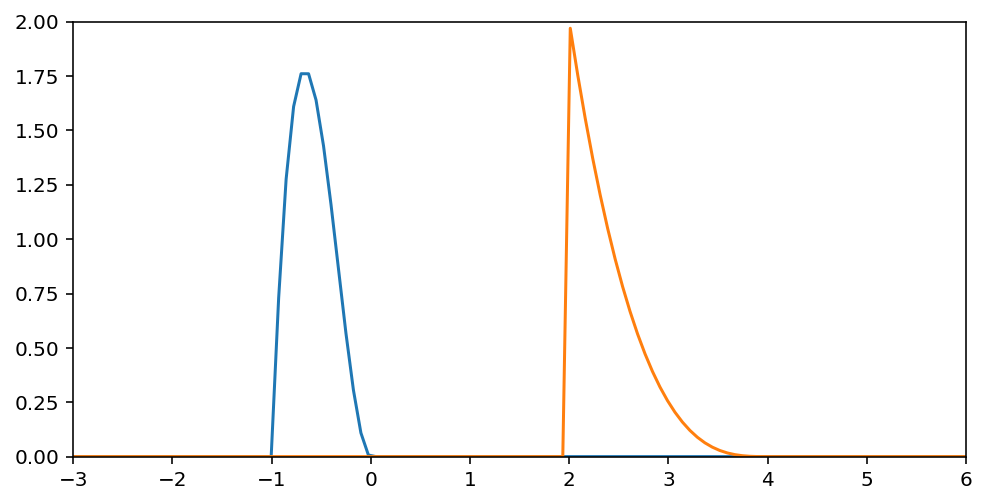

In [84]:
# beta 
plt.figure(figsize=(8, 4)) # Create a new figure with a particular size
x = np.linspace(-5, 10, 200) # Array with 200 linearly spaced points in [-5,5]

plt.plot(x, stats.beta.pdf(x, a=2, b=3, loc=-1, scale=1))
plt.plot(x, stats.beta.pdf(x, a=1, b=4, loc=2, scale=2))
axes = plt.gca()
axes.set_xlim([-3,6])
axes.set_ylim([0,2])

# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Loading the data

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

In [3]:
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5891
First 3 values in data set: [ 5.36  2.48  8.08]
Sum of data set: 1442.14543731


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:05 (5.36 minutes after midnight),
* the third call happened at about 00:07 (5.36 + 2.48 minutes),
* the fourth call happened at about 00:15, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [4]:
# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))

00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


## Task 1: Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day. The numbers are shown in the output above. You should find an appropriate way to visualize it.

[7, 5, 8, 7, 21, 42, 96, 189, 274, 344, 487, 892, 869, 401, 206, 169, 261, 430, 579, 383, 136, 45, 28, 12]


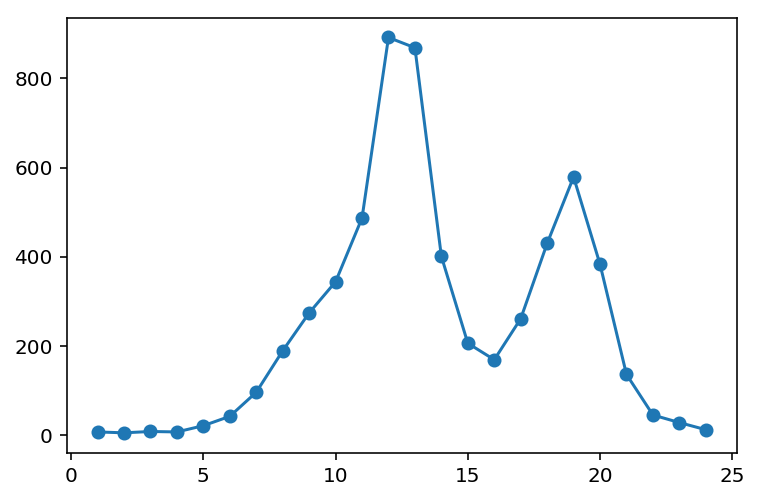

In [28]:
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

hours_arr = []
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    hours_arr.append(len(waiting_times_hour))
print (hours_arr)

hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
data = hours_arr
plt.scatter(x=hours, y=data)
plt.plot(hours,data)
plt.show()


## Task 2: Plot a histogram of the durations for one hour
Take the data for the 11th hour (so between 11am and 12pm) and plot a histogram showing the distribution over waiting times between calls during that hour.

In [40]:
# Determine the indeces of the beginning of 11am and the beginning of 12pm
def find_interval(start,end):
    start_index=0
    end_index=0
    sum_of_mins = 0 #should add up to 660
    for i, time_interval in enumerate(waiting_times_day):
        sum_of_mins += time_interval
        if start_index==0 and sum_of_mins >= start*60:
            start_index=i
        if end_index==0 and sum_of_mins >= end*60:
            end_index=i
            return start_index, end_index
        
find_interval(11,12)

(1479, 2371)

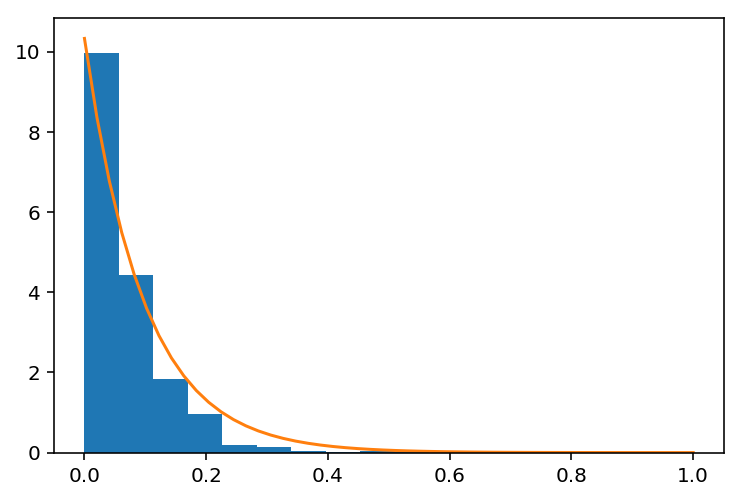

In [81]:
elevel_to_twelve = waiting_times_day[1479:2371]
data = elevel_to_twelve
plt.hist(data, density=True)
#plotting the pdf 
x=np.linspace(0,1)
plt.plot(x, stats.gamma.pdf(x, a=1., scale=1/10.33))
plt.show()

## Task 3: Guess the distribution
What type of distribution best represents the data in your histogram?

* Identify a type of distribution.
* Guess what the parameters of the distribution are.
* Plot the pdf of your best guess on top of your histogram, to see if they match.
* Important: you have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument `density=True` in the `hist` function.

In [85]:
# Gamma distribution best represents the data in my histogram. However, we can say that this is Exponential Distribution, a special case of Gammma Distribution, where parameter a=1.
# The parameter is the alpha which is the location (loc), and beta which is the rate.